In [2]:
import csv

entry_data = []

# Open the CSV file
with open('resultado_filtrado_con_cant_notas.csv', mode='r') as csv_file:
    # Create a CSV reader object
    csv_reader = csv.reader(csv_file, delimiter=';')
    
    # Skip the header
    next(csv_reader)
    
    # Iterate over each row in the CSV
    for row in csv_reader:
        # Append the row to the entry_data list
        entry_data.append(row)

path,file_name,title,artist,offset,bpms,music,time_signatures,tick_counts,notes,cant_notas = entry_data[0]
print(f"Título: {title}\nArtista: {artist}\nOffset: {offset}\nBPMS: {bpms}\nMúsica: {music}\nTime Signatures: {time_signatures}\nTick Counts: {tick_counts}\nNotas: {notes}\nCantidad de notas: {cant_notas}")

Título: Amadeustreme
Artista: Doin
Offset: -0,05
BPMS: 162
Música: media/1086.mp3
Time Signatures: 4=4
Tick Counts: 4
Notas: [00000000000000000000;00010010000000100100;00010010000010000000;00100100000100000100;00010010000010000000;01000000101000000100;01000000100010000000;00100000010001000100;01000000100010000000;00010001000000110000;01000001000000100000;01000001001000000001;00010001001000000000;00100000010001001000;00100100000100000100;00020000300200003000;00100001001000001000;00100000100100000100;10000000010100000100;00010001001000000001;10000100000001000100;00001010000010010000;00110000000000000000;01000000000000000010;00100000000000100100;00001010000000000100;10000000000001000100;00010010000000000010;01000000000010010000;00001001000000000010;00100000000101000000;00010000000000001000;00100000001000000100;10000000100000000100;00001000000100000100;01000000100000001000;00010000000010000001;10000001001000000001;00100000100101000000;00010010000010010000;00010001000100000100;0001100010001

/tmp/ipykernel_123849/455731046.py:17: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(sound_filepath, duration=None)


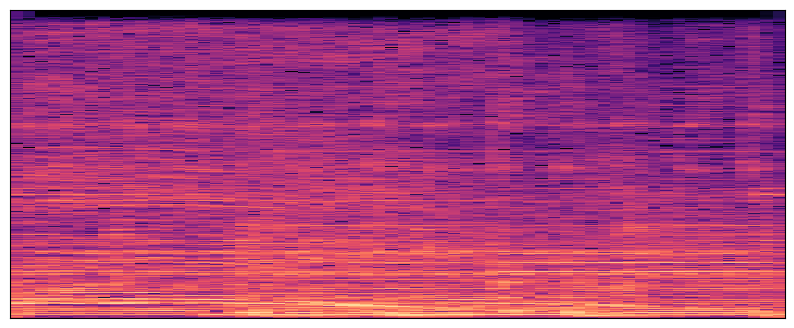

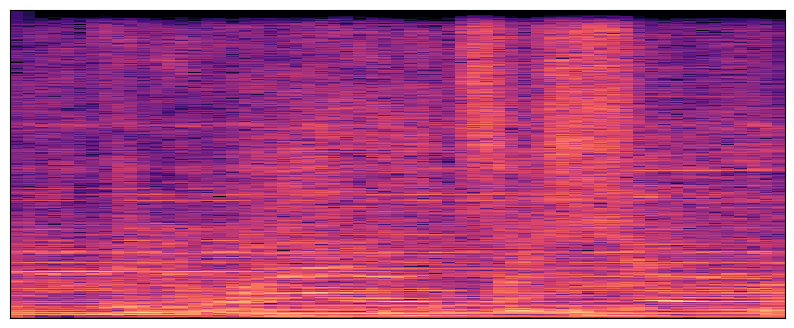

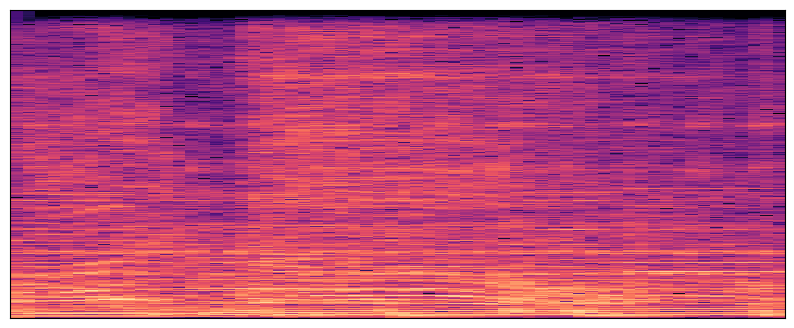

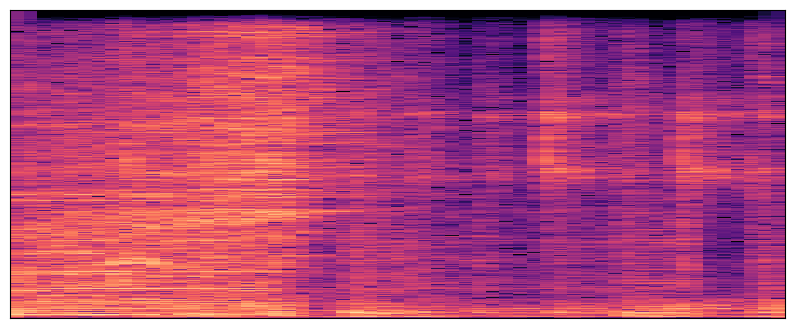

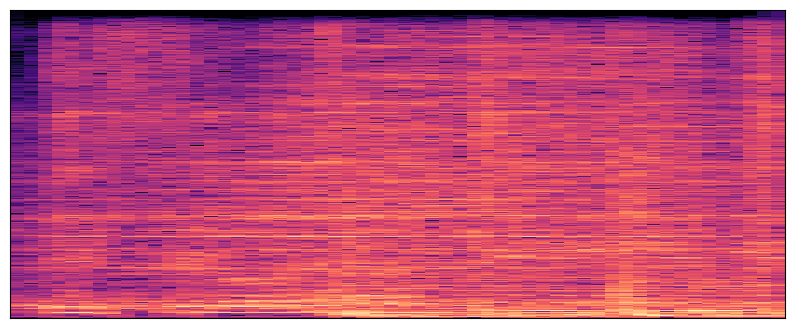

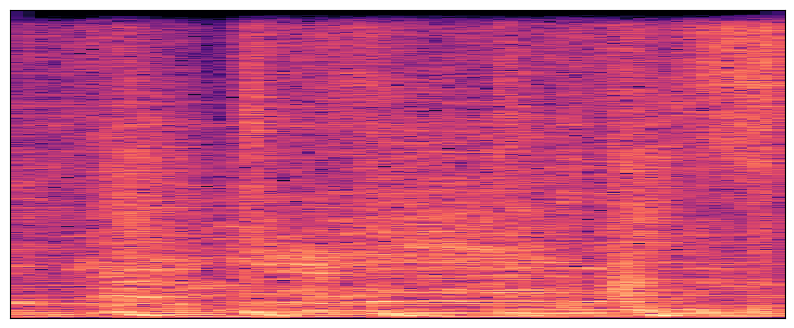

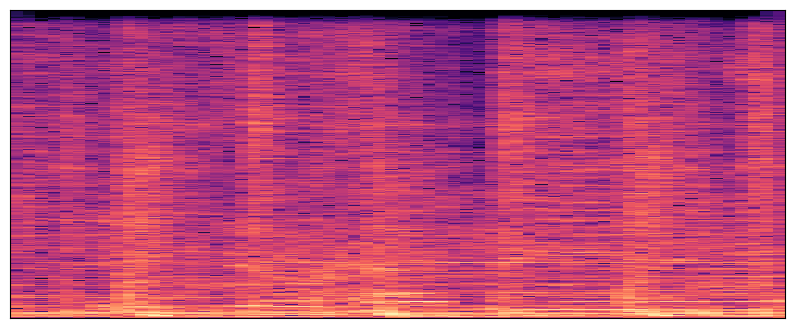

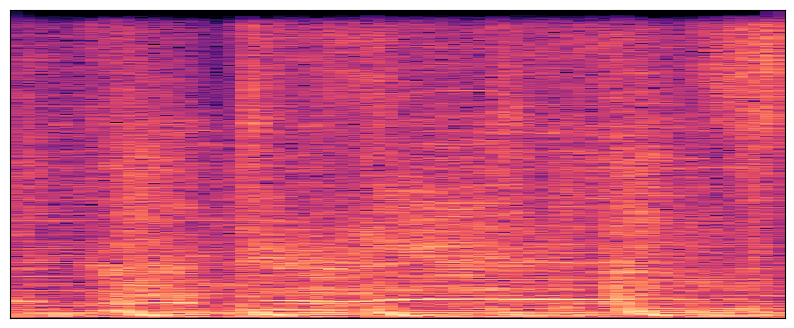

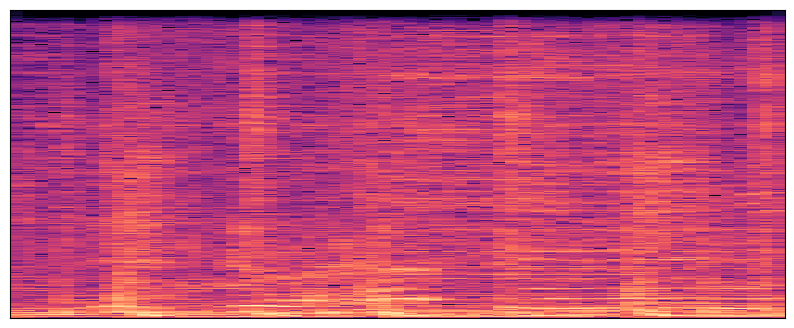

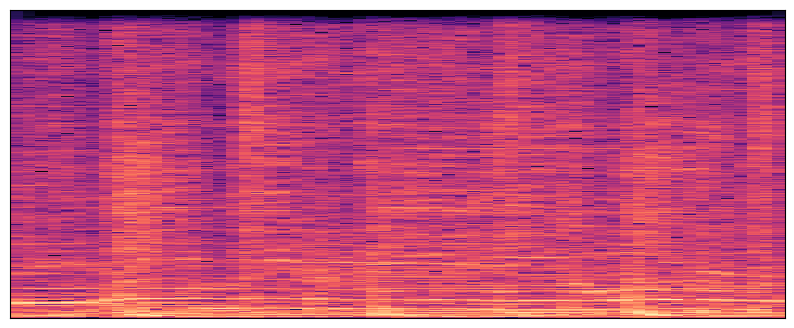

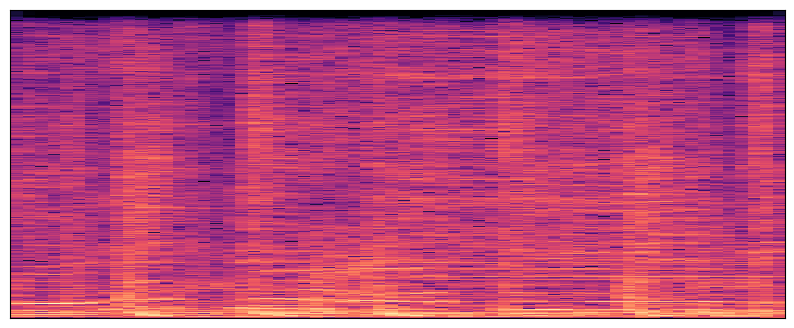

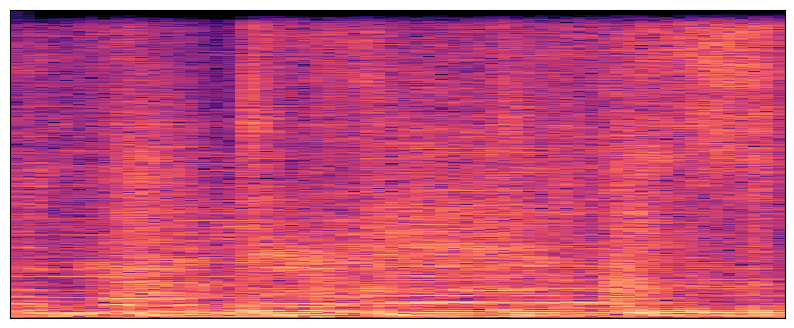

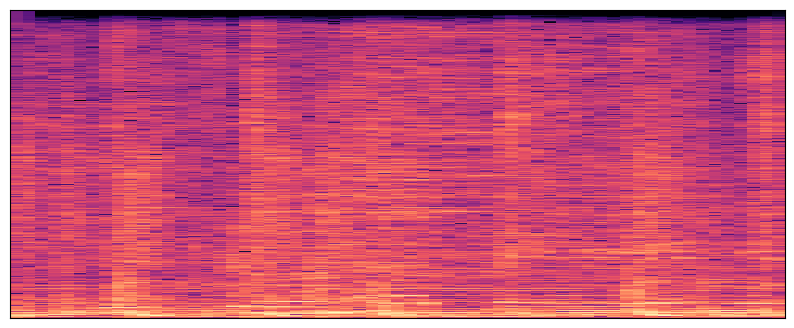

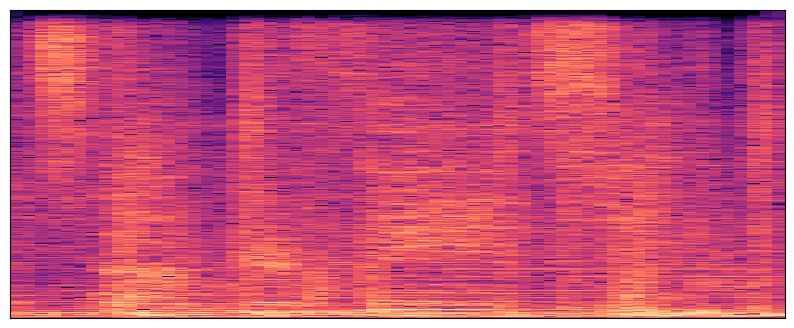

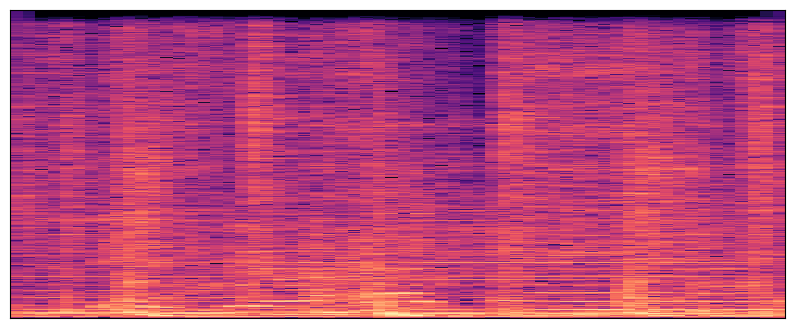

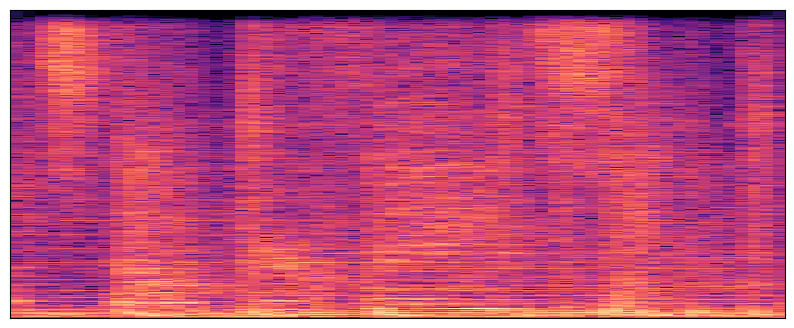

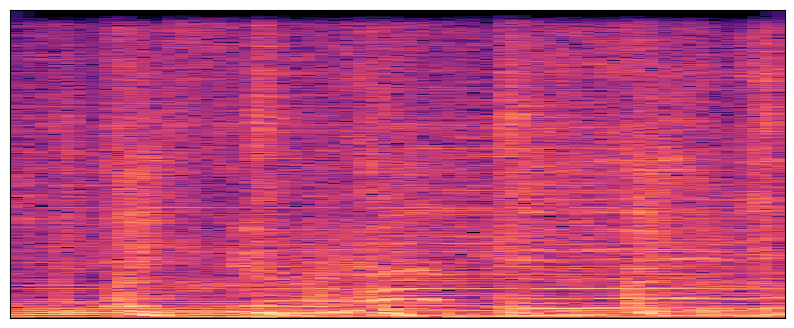

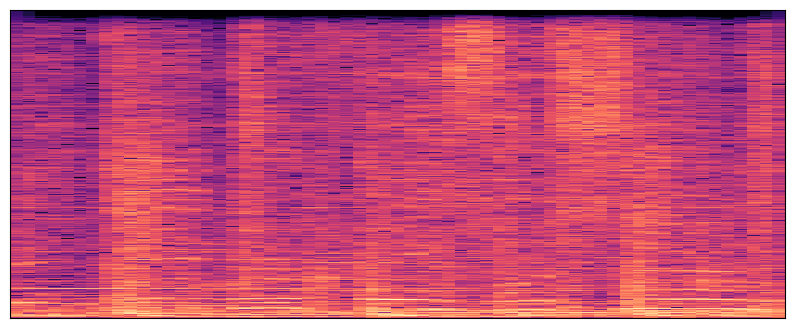

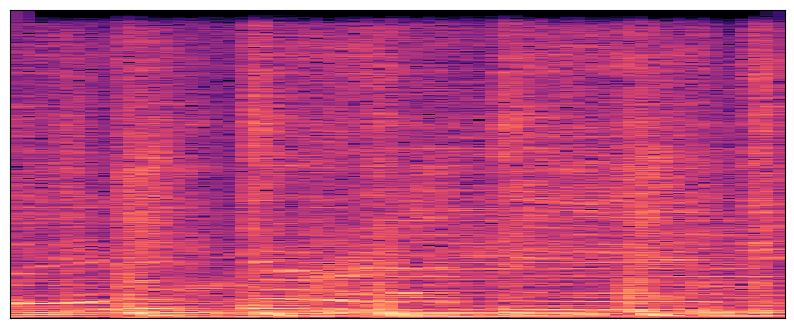

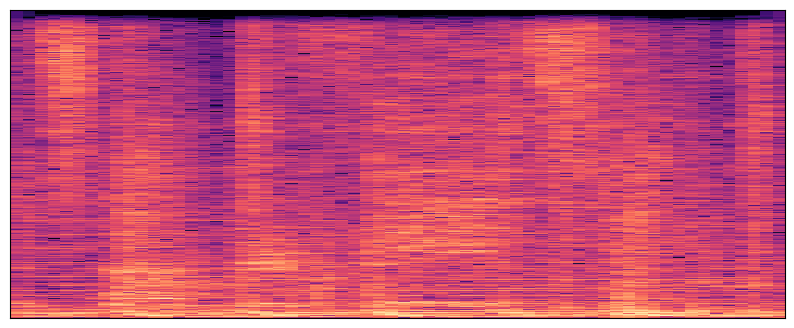

KeyboardInterrupt: 

In [5]:
import numpy as np
from scipy.io.wavfile import read
from scipy.signal import stft
import matplotlib.pyplot as plt
import librosa
import os

cont_encontradas = 0
cont_no_encontradas = 0

for path,file_name,title,artist,offset,bpms,music,time_signatures,tick_counts,notes,cant_notas in entry_data[:34]:
    path = path.replace('D:\\Songs\\', '').replace("\\","/")
    sound_filepath = '/media/datos/android/Descargas/Songs/' + path
    try:

        # Cargar archivo de audio
        y, sr = librosa.load(sound_filepath, duration=None)
    
    except FileNotFoundError:
        cont_no_encontradas += 1
        continue
    
    cont_encontradas += 1

    # Detecta el ritmo y los latidos
    tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
        
    # Convierte marcos de tiempo a segundos
    beat_times = librosa.frames_to_time(beats, sr=sr)

    # un "compas" se define como 4 latidos consecutivos (4/4)
    # por lo tanto hay que recorrer de 4 en 4 los latidos
    compases = [beats[i:i+4] for i in range(0, len(beats), 4)]
    
    # Dibujar el espectrograma para los primeros 5 compases
    i = -1
    for compas in compases:
        i += 1
        if len(compas) == 4:
            frame1, frame2, frame3, frame4 = compas
            # Convertir los frames a muestras
            start_sample = librosa.frames_to_samples(frame1)
            end_sample = librosa.frames_to_samples(frame4)

            # Obtener el segmento de audio correspondiente a los frames
            y_segment = y[start_sample:end_sample]

            # Calcular un tamaño de ventana adecuado
            n_fft = min(len(y_segment), 2048)

            # Aplicar la STFT al segmento de audio con el tamaño de ventana ajustado
            D = librosa.amplitude_to_db(np.abs(librosa.stft(y_segment, n_fft=n_fft)), ref=np.max)

            # Dibujar el espectrograma
            plt.figure(figsize=(10, 4))
            librosa.display.specshow(D, sr=sr, x_axis=None, y_axis=None)
            plt.show()



        


print(f"No encontradas: {cont_no_encontradas}\n Enconradas: {cont_encontradas}")

    

In [4]:
cont_encontradas, cont_no_encontradas

(2, 32)